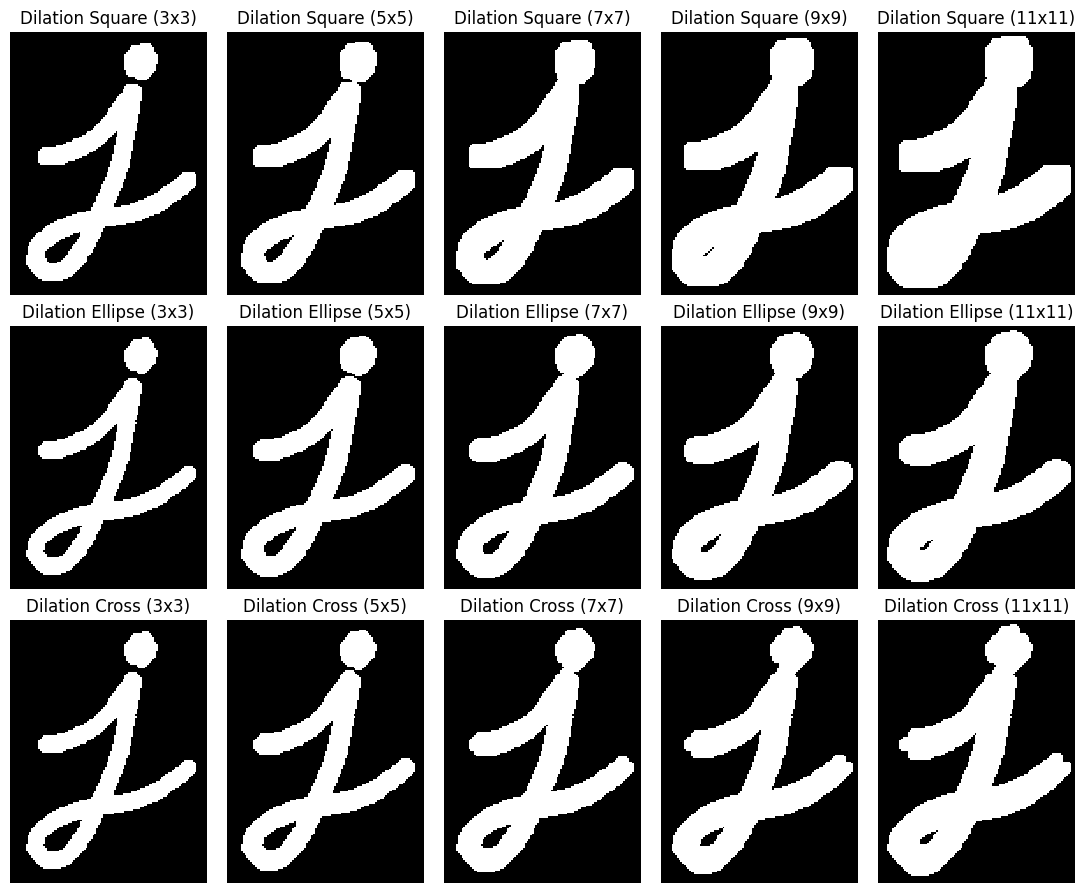

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 커널 크기 설정
kernel_sizes = [3, 5, 7, 9, 11]

# 이미지 불러오기
image = cv2.imread('morphology_j.png', cv2.IMREAD_GRAYSCALE)

# 이진화 처리 (이미지가 이미 이진화되어 있지 않을 경우)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 커널 정의를 리스트로 관리 (순서 유지)
kernel_definitions = [
    ('Square', lambda size: np.ones((size, size), np.uint8)),  # 사각형 커널
    ('Ellipse', lambda size: cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size, size))),  # 원형 커널
    ('Cross', lambda size: cv2.getStructuringElement(cv2.MORPH_CROSS, (size, size))),  # 십자형 커널
]

# 결과 저장
dilated_images = []

for kernel_type, kernel_func in kernel_definitions:
    for size in kernel_sizes:
        # 커널 생성 및 팽창 연산 수행
        kernel = kernel_func(size)
        dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
        dilated_images.append((kernel_type, size, dilated_image))

# 결과 시각화
plt.figure(figsize=(11, 9))

for idx, (kernel_type, size, dilated_image) in enumerate(dilated_images):
    plt.subplot(len(kernel_definitions), len(kernel_sizes), idx + 1)
    plt.title(f"Dilation {kernel_type} ({size}x{size})", fontsize=12)
    plt.imshow(dilated_image, cmap='gray', interpolation='nearest')
    plt.axis("off")

plt.tight_layout()
plt.show()